# Task 3
We implemented a PMMH algorithm, which relies on the bootstrap filter constructed in Step 1, and compare its performance to the MCMC sampler of step 2. For instance, what is the impact of the number of particles N on the mixing properties of PMMH, compared the ideal algorithm developped in Step 2 ? (This can be assessed by plotting the ACFs for instance; see also the discussion in the course on calibrating PMMH.)

In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))
project_root = Path.cwd().parent

In [2]:
import src.pmmh as pmmh 
import utils.load_data as ld

## Data loading

In [3]:
excel_path = project_root / "data" / "data_groupe_T1000.xlsx"
if not excel_path.exists():
    raise FileNotFoundError(f"File not found: {excel_path}")

# Série 1 (sans covariates)
y1, X1, h1, beta1, p1 = ld.load_data(excel_path, "Serie_1")

# Série 2 (covariates)
y2, X2, h2, beta2, p2 = ld.load_data(excel_path, "Serie_2")

# Série 3 (covariates)
y3, X3, h3, beta3, p3 = ld.load_data(excel_path, "Serie_3")

 Load: Serie_1 (Beta: None)
 Load: Serie_2 (Beta: [-0.5  0.3])
 Load: Serie_3 (Beta: [-0.5  0.4 -0.3])


## Pmmh analysis

In [4]:
# Manager instantiation
manager = pmmh.CoxAnalysisManager(n_iter=2000, burnin=500)


========== Starting Analysis: Serie 1 (No Covariables) ==========
-> Mode: No covariates (fixed tau/expo).
-> Launching PMMH Low N (200 particles)...
-> Launching PMMH High N (1500 particles)...


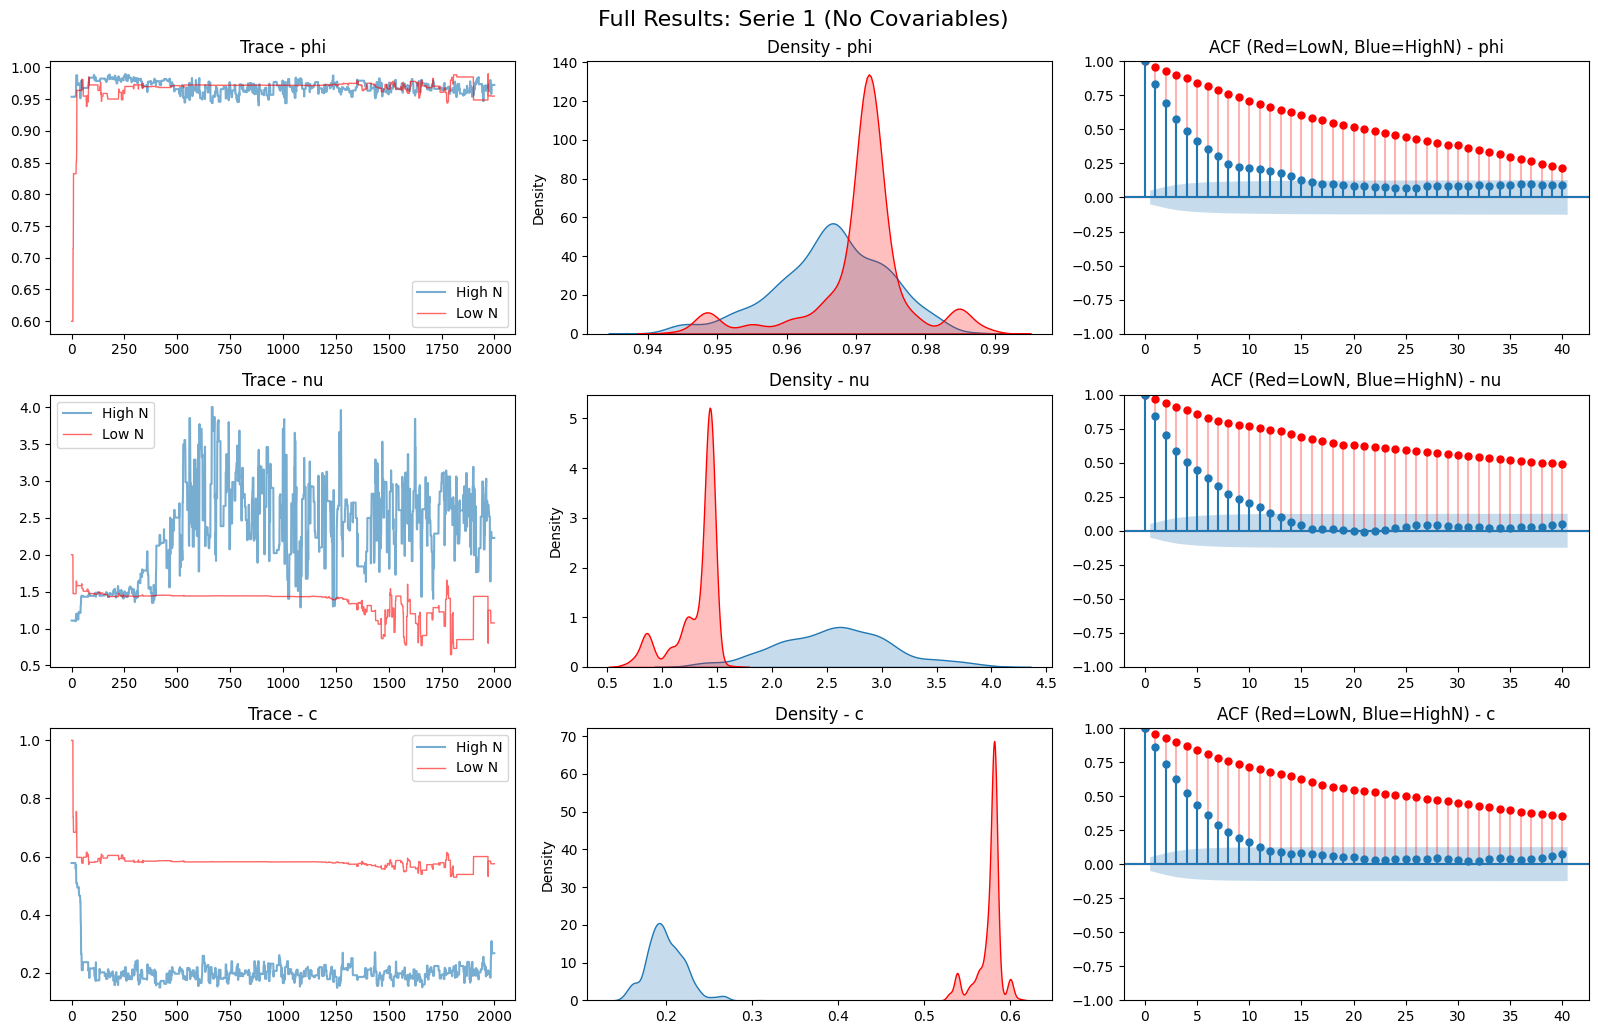

In [5]:
# Analysis Serie 1
manager.run_analysis(
    name="Serie 1 (No Covariables)",
    y_data=y1
)


========== Starting Analysis: Serie 2 (2 Covariables) ==========
-> Mode: Regression with 2 covariate(s).
-> Launching PMMH Low N (200 particles)...
-> Launching PMMH High N (1500 particles)...


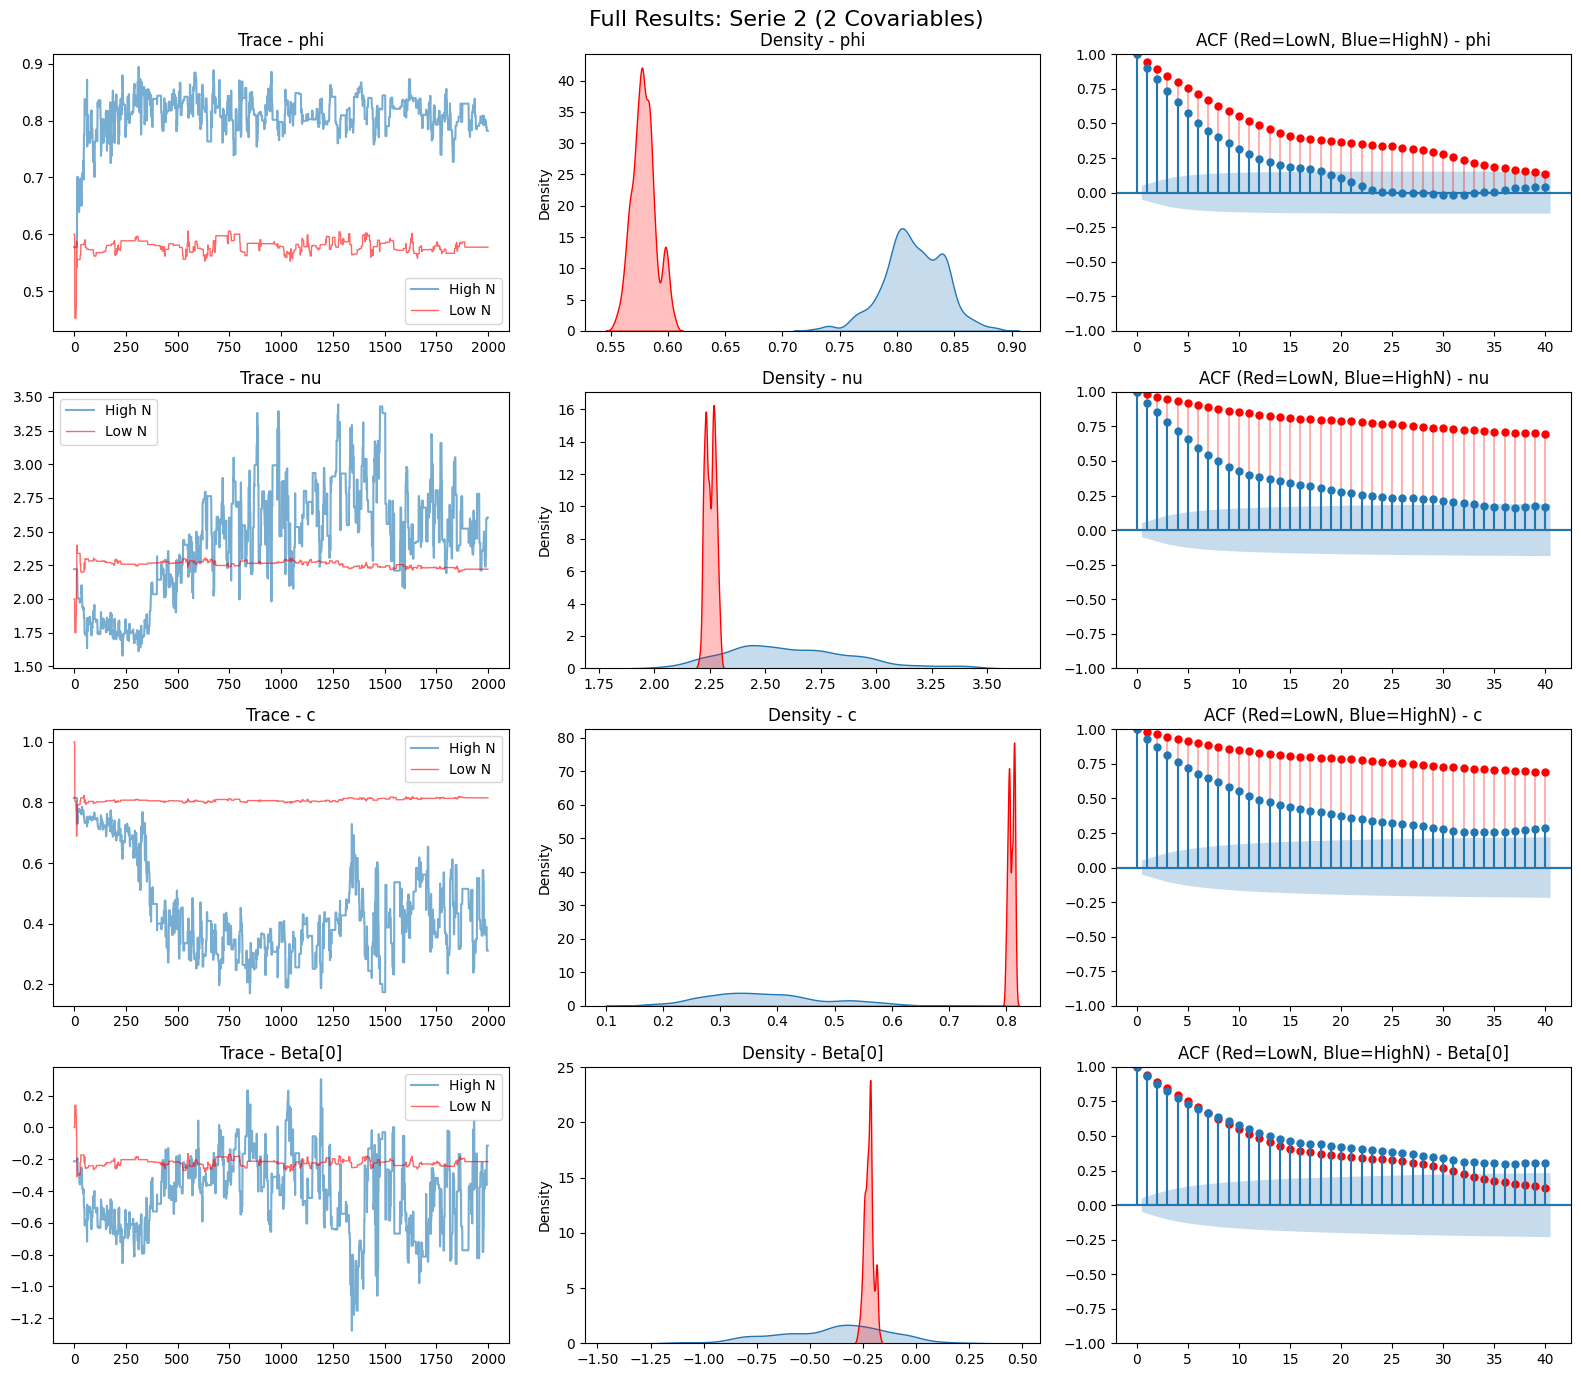

In [6]:
# Analysis Serie 2
manager.run_analysis(
    name="Serie 2 (2 Covariables)",
    y_data=y2,
    X_data=X2,
    tau_data=np.ones(1000)
)


========== Starting Analysis: Serie 3 (3 Covariables + Tau) ==========
-> Mode: Regression with 3 covariate(s).
-> Launching PMMH Low N (200 particles)...
-> Launching PMMH High N (1500 particles)...


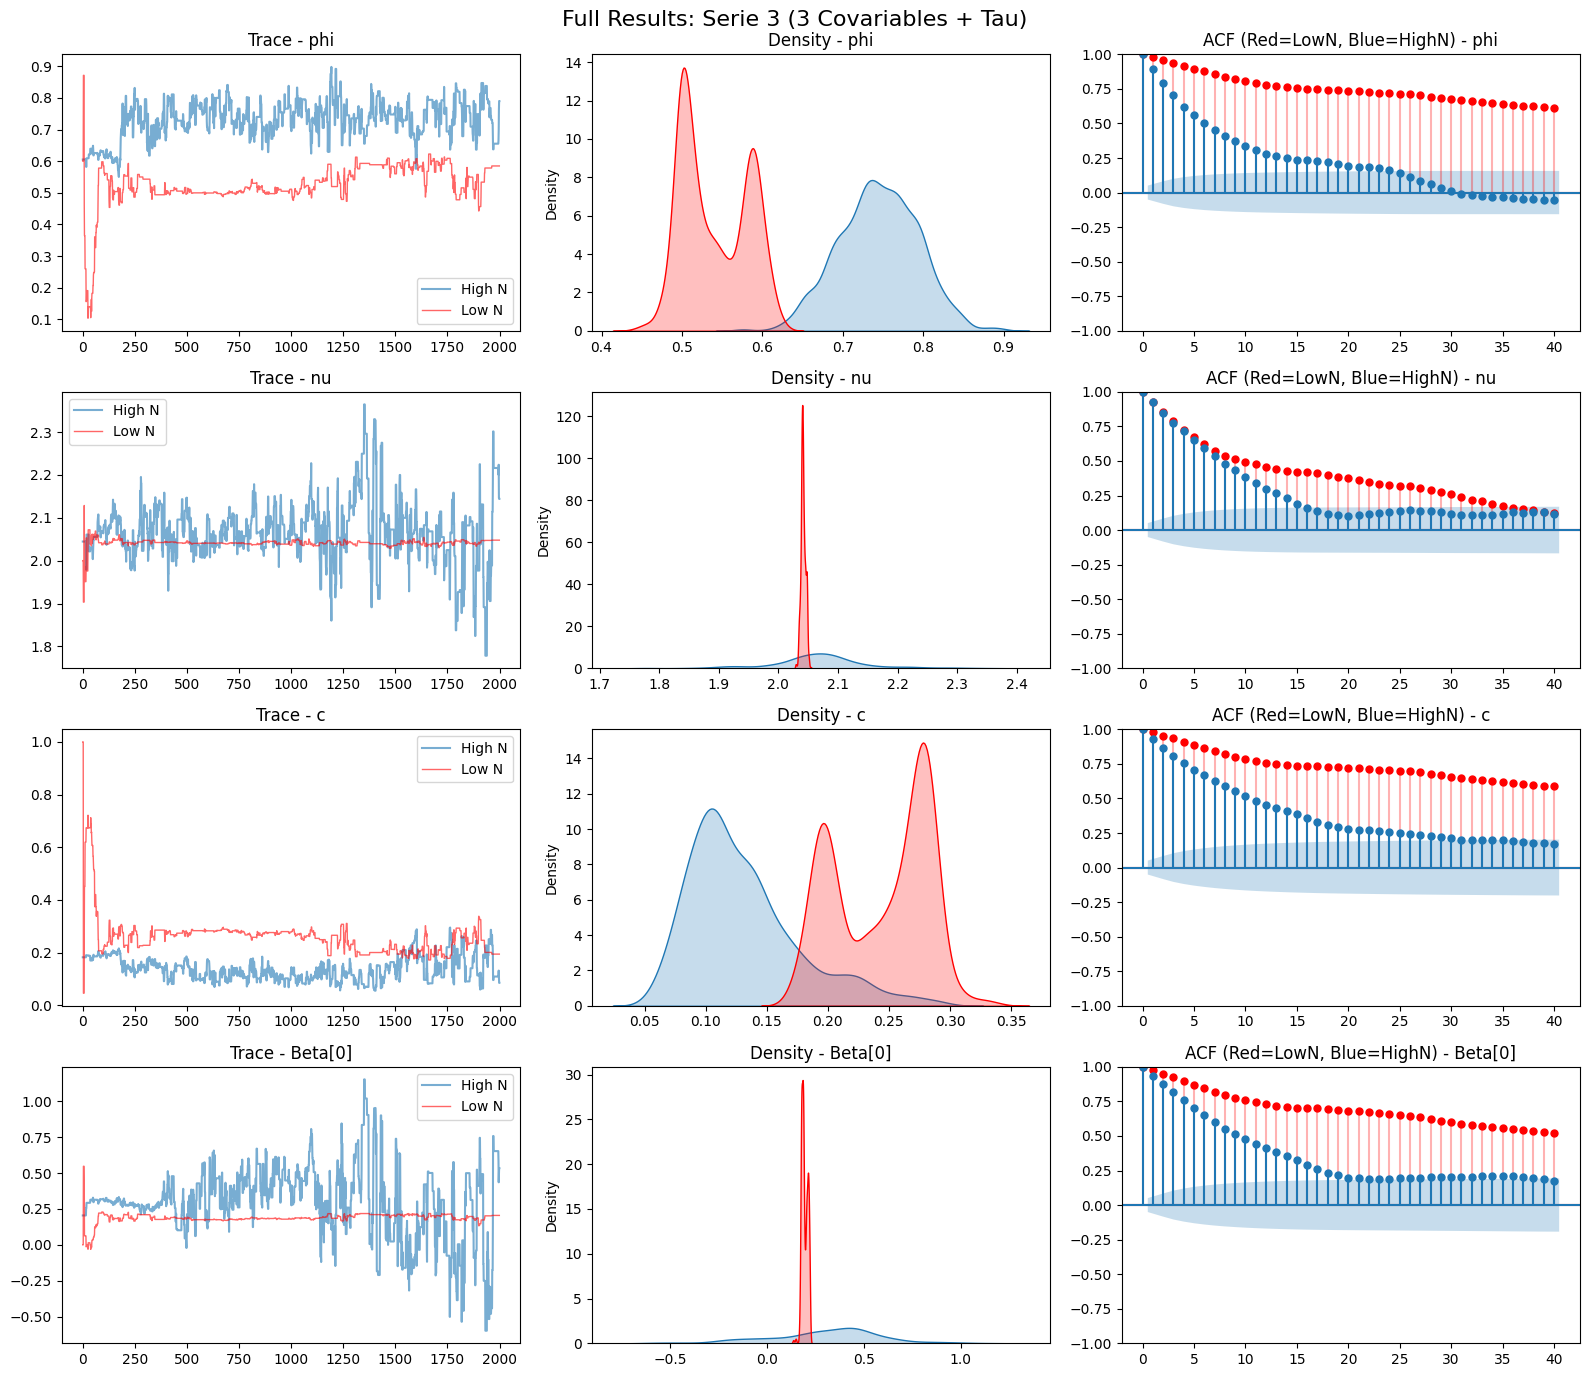

In [7]:
# Analysis Serie 3
manager.run_analysis(
    name="Serie 3 (3 Covariables + Tau)",
    y_data=y3,
    X_data=X3,
    tau_data=np.ones(1000)
)

## Variance estimate


========== Stability Test (Variance): Stability Test - Series 1 ==========
-> Launching 10 independent runs with N=300 particles...
   Run 1/10 completed.
   Run 2/10 completed.
   Run 3/10 completed.
   Run 4/10 completed.
   Run 5/10 completed.
   Run 6/10 completed.
   Run 7/10 completed.


/opt/python/lib/python3.13/site-packages/particles/resampling.py:222: RuntimeWarning: invalid value encountered in subtract
  w = np.exp(self.lw - m)


   Run 8/10 completed.
   Run 9/10 completed.
   Run 10/10 completed.


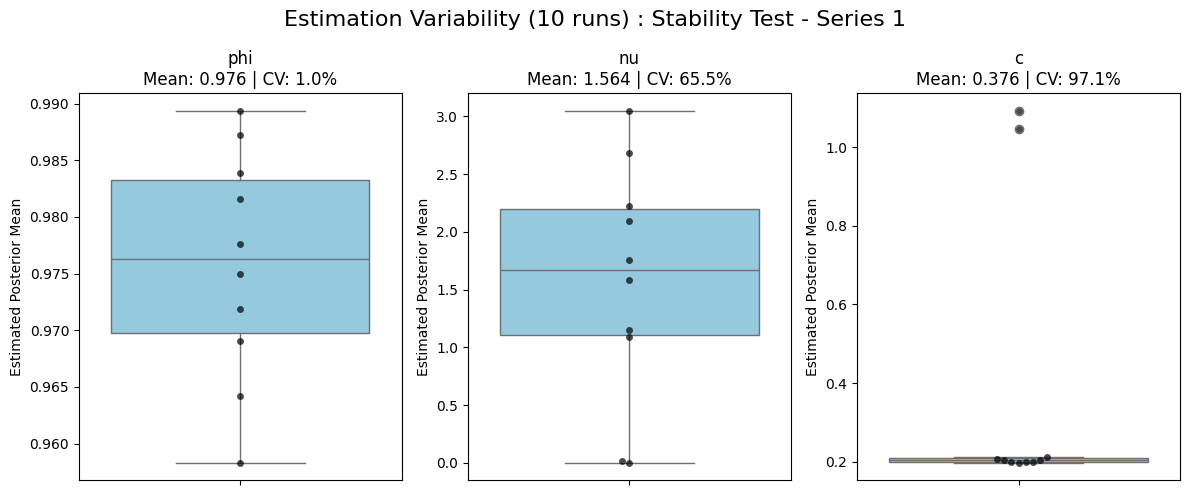

In [8]:
# Running the test on Series 1 
df_results = manager.run_stability_test(
    name="Stability Test - Series 1",
    y_data=y1,
    X_data=X1,
    Nx=300         # Number of particles (speed/precision trade-off)
)


========== Stability Test (Variance): Stability Test - Series 2 ==========
-> Launching 10 independent runs with N=300 particles...
   Run 1/10 completed.
   Run 2/10 completed.
   Run 3/10 completed.
   Run 4/10 completed.
   Run 5/10 completed.
   Run 6/10 completed.
   Run 7/10 completed.
   Run 8/10 completed.
   Run 9/10 completed.
   Run 10/10 completed.


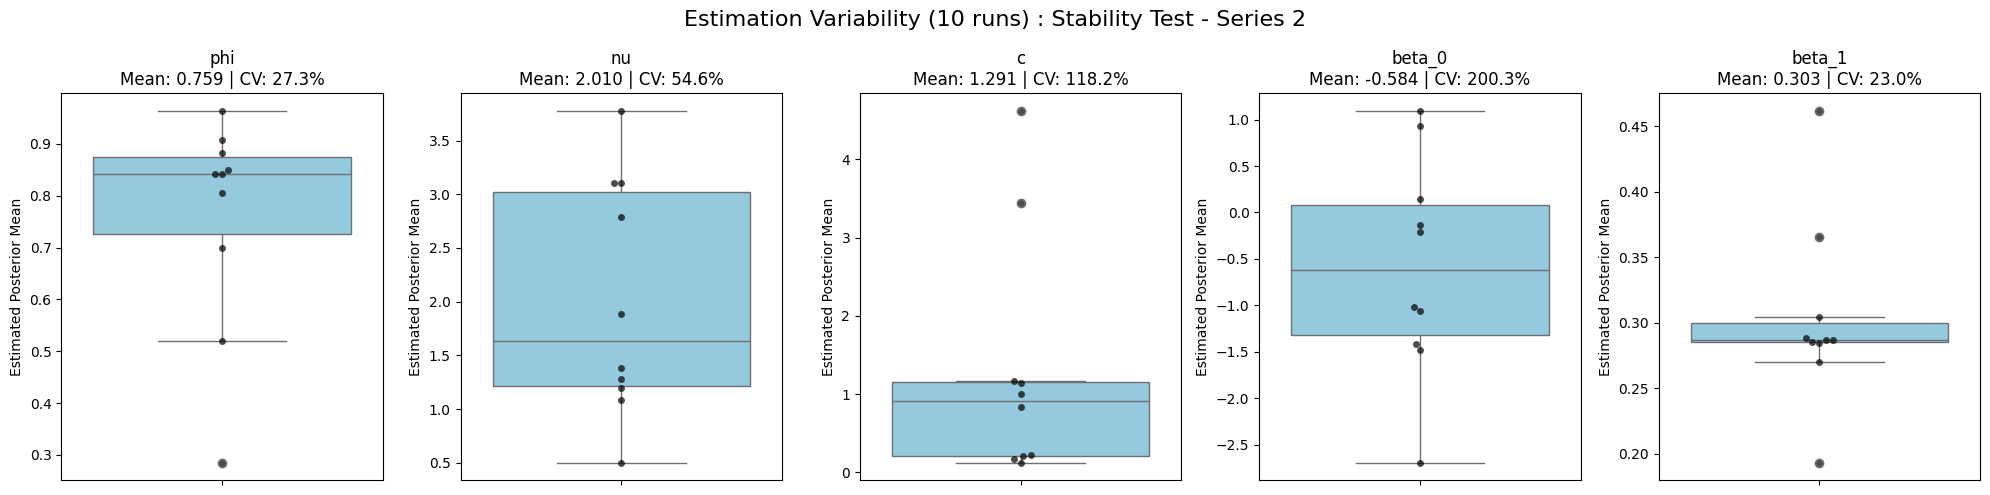

In [9]:
# Running the test on Series 2 
df_results = manager.run_stability_test(
    name="Stability Test - Series 2",
    y_data=y2,
    X_data=X2,
    Nx=300         # Number of particles (speed/precision trade-off)
)


========== Stability Test (Variance): Stability Test - Series 3 ==========
-> Launching 10 independent runs with N=300 particles...
   Run 1/10 completed.
   Run 2/10 completed.
   Run 3/10 completed.
   Run 4/10 completed.
   Run 5/10 completed.
   Run 6/10 completed.
   Run 7/10 completed.
   Run 8/10 completed.
   Run 9/10 completed.
   Run 10/10 completed.


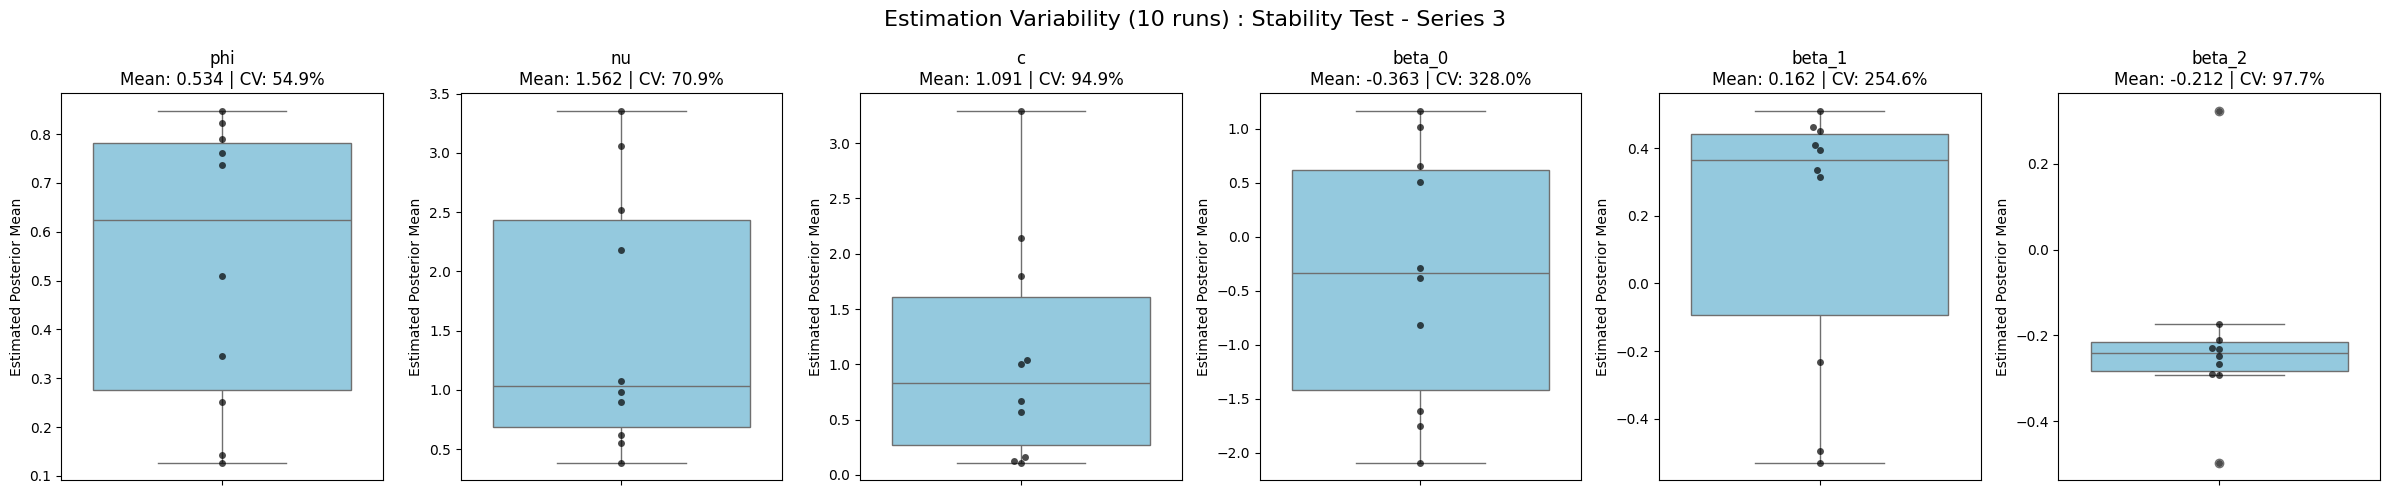

In [10]:
# Running the test on Series 3 
df_results = manager.run_stability_test(
    name="Stability Test - Series 3",
    y_data=y3,
    X_data=X3,
    Nx=300         # Number of particles (speed/precision trade-off)
)

## Methods comparison (focus on series 2)

**Comparative Analysis**: PMMH (Step 3) vs. Ideal MCMC (Step 2)

We compare the PMMH implementation against the "Ideal" MCMC benchmark (Step 2), which relies on exact likelihood computation and serves as our ground truth

1. Low Particle Regime ($N=200$) - The "Sticking" PhenomenonWith few particles, the variance of the likelihood estimator $\hat{p}(y|\theta)$ is high. This leads to "sticking":Mechanism: When the particle filter. significantly overestimates the likelihood (a "lucky" estimate), the chain gets "trapped" in that state, rejecting subsequent proposals.Observation: Trace plots show flat plateaus, and the Autocorrelation Function (ACF) decays very slowly. Mixing is inefficient compared to the ideal sampler.

2. High Particle Regime ($N=1500$) - Recovering the BenchmarkIncreasing $N$ reduces the estimator's variance, restoring standard MCMC behavior:Observation: Trace plots become "hairy" and fluid, closely resembling the Ideal MCMC traces.Validation: The posterior densities (KDE) overlap perfectly with the Step 2 benchmark, and the ACF decays rapidly.Conclusion: The Variance-Computation Trade-offPMMH theoretically targets the exact posterior regardless of $N$. However, efficiency depends on the variance of the likelihood estimator. Low $N$ is computationally cheap but results in poor mixing, while High $N$ ($1500$) mimics the Ideal MCMC at a higher computational cost.